*  This program computes 
*    the optimal portfolio with 1 risky asset and 1 risk-free asset 
*     Then we compare it with the strategy that investing mkt 100%

In [ ]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data 

df = pd.read_excel('Factors_July26_July11.xlsx')        # It has 5 columns:  date, mkt, size, b/m, riskree rate
                                                    # downloaded from Ken French's website

mkt = df.loc[:,"mkt"]/100                       # Mkt excess return;  divided by 100 due to data are in %
rf = df.loc[:,"rate"]/100

gamma = 2.5                             # The risk-averse coeff.

mu = mkt.mean()                          # The expected mkt excess return
sig2 = mkt.var()                         # The var of the mkt excess return
sigma = np.sqrt(sig2)                    # Its vol

w = (1/gamma)*mu/sig2                     # The optimal weight on mkt

print('Rsik avrersion and Optimal wight on the market \n')
print('        {0:.4f}  {1:.4f}  \n '.format(gamma,w))   

Rsik avrersion and Optimal wight on the market 

        2.5000  0.8398  
 


In [ ]:
# Compute the Sharpe Ratio of the Opt Port and Mkt

T = len(df)                               # The number of obs


Port=np.ones((T,))             # define this T vector to store the returns on the portfolio

Port[0] = w*mkt[0] + rf[0]      # Example:  return in the first period; the weight on rf is absorbed 
                                    # into the previous excess return term, see formulas in the slides

for t in range(T):
    Port[t] = w*mkt[t] + rf[t]             # may simplified to vector form:  Port=w*mkt + rf

ExPort = w*mkt                             # excess return of the optimla portfolio
muP = ExPort.mean()
sig2P = ExPort.var()
sigP = np.sqrt(sig2P)
SharpeP = np.sqrt(12)*muP/sigP             # sqrt(12) is to annulaize the Sharpe Ratio

# For the mkt
 
Sharpe = np.sqrt(12)*mu/sigma

print('The Annualized Sharpe ratios of the Opt Port and Mkt \n')
print('          {0:.4f}   {1:.4f}  \n'.format(SharpeP, Sharpe)) 

The Annualized Sharpe ratios of the Opt Port and Mkt 

          0.3963   0.3963  



In [ ]:
# Compute the accu returns of the opt port and the mkt

CC_Port = np.ones((T,))       # to store the accumulative returns   
CC = np.ones((T,))           # to store the accumulative returns 

mkt2 = mkt + rf       # Add back riskfree rate to get pure mkt return

CC_Port[0] = 1 + Port[0]             # initial accu return
CC[0] = 1 + mkt2[0]                 # initial accu return

for t in range(T-1):
    CC_Port[t+1] = CC_Port[t]*(1+Port[t+1])
    CC[t+1] = CC[t]*(1+mkt2[t+1])
    
print('Treminal wealth in Opt Port and Mkt  \n')
print(CC_Port[T-1])  
print(CC[T-1])  

Treminal wealth in Opt Port and Mkt  

1439.0686924162712
2540.3983705076002


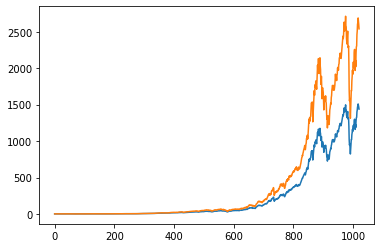

In [ ]:
# plot the accu returns  

p=plt.plot(CC_Port)
p1 = plt.plot(CC)